In [353]:
import os, sklearn, math
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from joblib import dump, load

tf.random.set_seed(42)

data = '231008_0119_2kPa_2line_Data'
dataname = data+'_B26'
filename = 'myData/'+data+'.csv'
SD1 = pd.read_csv(filename)
SD1=SD1.iloc[:,:28]
SensorData1 = SD1
SD1.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx26,Sx27,Sx30,Sx31,Sx32,Sx33,Force,z,theta,r
count,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,...,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000
mean,47.789284,46.587351,55.058288,43.507158,51.653830,64.754176,60.831080,53.016065,62.286681,56.452334,...,47.492486,54.471498,50.516973,55.370615,55.781778,49.804991,39.021419,80.001453,170.042368,3.200062
std,1.435331,1.708339,1.499085,1.786158,1.199627,1.697183,1.966231,1.891453,1.799997,1.444436,...,2.180379,3.001172,2.486547,1.726292,1.757992,1.515384,30.667866,48.438790,103.739277,1.600254
min,41.300000,40.700000,47.700000,32.800000,43.300000,45.700000,46.800000,44.600000,50.700000,47.200000,...,37.500000,45.900000,42.700000,48.200000,46.400000,39.000000,-455.760000,0.000000,0.000000,0.800000
25%,46.900000,45.500000,54.100000,42.300000,50.900000,64.000000,60.000000,51.800000,61.200000,55.500000,...,46.300000,52.800000,49.100000,54.200000,54.700000,48.800000,11.070000,40.000000,80.000000,1.600000
50%,47.800000,46.600000,55.100000,43.500000,51.700000,64.900000,61.000000,52.900000,62.200000,56.500000,...,47.300000,54.000000,50.200000,55.300000,55.800000,49.800000,33.260000,80.000000,180.000000,3.200000
75%,48.700000,47.600000,56.100000,44.600000,52.400000,65.700000,62.000000,54.000000,63.200000,57.400000,...,48.300000,55.300000,51.400000,56.400000,56.900000,50.800000,59.360000,120.000000,260.000000,4.800000
max,54.500000,55.400000,61.900000,52.200000,58.000000,69.300000,66.400000,63.900000,71.100000,66.800000,...,63.400000,70.900000,66.700000,66.700000,65.700000,56.800000,134.500000,160.000000,340.000000,5.600000


In [354]:
SDreal = SD1
SDreal.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx26,Sx27,Sx30,Sx31,Sx32,Sx33,Force,z,theta,r
count,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,...,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000
mean,47.789284,46.587351,55.058288,43.507158,51.653830,64.754176,60.831080,53.016065,62.286681,56.452334,...,47.492486,54.471498,50.516973,55.370615,55.781778,49.804991,39.021419,80.001453,170.042368,3.200062
std,1.435331,1.708339,1.499085,1.786158,1.199627,1.697183,1.966231,1.891453,1.799997,1.444436,...,2.180379,3.001172,2.486547,1.726292,1.757992,1.515384,30.667866,48.438790,103.739277,1.600254
min,41.300000,40.700000,47.700000,32.800000,43.300000,45.700000,46.800000,44.600000,50.700000,47.200000,...,37.500000,45.900000,42.700000,48.200000,46.400000,39.000000,-455.760000,0.000000,0.000000,0.800000
25%,46.900000,45.500000,54.100000,42.300000,50.900000,64.000000,60.000000,51.800000,61.200000,55.500000,...,46.300000,52.800000,49.100000,54.200000,54.700000,48.800000,11.070000,40.000000,80.000000,1.600000
50%,47.800000,46.600000,55.100000,43.500000,51.700000,64.900000,61.000000,52.900000,62.200000,56.500000,...,47.300000,54.000000,50.200000,55.300000,55.800000,49.800000,33.260000,80.000000,180.000000,3.200000
75%,48.700000,47.600000,56.100000,44.600000,52.400000,65.700000,62.000000,54.000000,63.200000,57.400000,...,48.300000,55.300000,51.400000,56.400000,56.900000,50.800000,59.360000,120.000000,260.000000,4.800000
max,54.500000,55.400000,61.900000,52.200000,58.000000,69.300000,66.400000,63.900000,71.100000,66.800000,...,63.400000,70.900000,66.700000,66.700000,65.700000,56.800000,134.500000,160.000000,340.000000,5.600000


In [355]:
# SDreal 값이 999이거나 100이상인 이상치 제거
SDreal = SDreal[~(SDreal == 999).any(axis=1)]
SDreal = SDreal[~(SDreal == 255).any(axis=1)]
SDreal = SDreal[~(SDreal == 4).any(axis=1)]

# SDreal에서 결측값 제거
SDreal = SDreal[~SDreal.isna().any(axis=1)]

# 'Force', 'theta', 'z', 'r' 열을 제외한 열에서 100 이상의 값을 제거
cols_to_exclude = ["Force", "theta", "z", "r"]
cols_to_check = [col for col in SDreal.columns if col not in cols_to_exclude]

SDreal = SDreal[~((SDreal < 0) & (SDreal.columns == "Force")).any(axis=1)]
SDreal = SDreal[~((SDreal >= 10000) & (SDreal.columns == "Force")).any(axis=1)]


#SDreal = SDreal[SDreal["r"] >= 0.8*1]
SDreal = SDreal[SDreal["z"] <= 160]
SDreal = SDreal[SDreal["z"] >= 0]

import numpy as np
toRad = np.pi/180.0
SDreal['cos']=np.cos(SDreal['theta']*toRad)
SDreal['sin']=np.sin(SDreal['theta']*toRad)
SDreal.describe()


,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx30,Sx31,Sx32,Sx33,Force,z,theta,r,cos,sin
count,99122.000000,99122.000000,99122.000000,99122.000000,99122.000000,99122.000000,99122.000000,99122.000000,99122.000000,99122.000000,...,99122.000000,99122.000000,99122.000000,99122.000000,99122.000000,99122.000000,99122.000000,99122.000000,99122.000000,9.912200e+04
mean,47.785374,46.565754,55.053824,43.490999,51.653430,64.754710,60.839275,53.022690,62.273591,56.440344,...,50.504461,55.366824,55.774105,49.784367,37.789275,79.997902,170.048223,3.066750,-0.000322,-7.532672e-05
std,1.436813,1.708538,1.496517,1.783120,1.205012,1.686369,1.947581,1.893671,1.793562,1.451408,...,2.460390,1.731227,1.757833,1.522854,30.908831,48.439815,103.747361,1.692098,0.707167,7.070537e-01
min,41.300000,40.700000,47.700000,32.800000,43.300000,45.700000,46.800000,44.600000,50.700000,47.200000,...,42.700000,48.200000,46.400000,39.000000,4.010000,0.000000,0.000000,0.800000,-1.000000,-9.848078e-01
25%,46.800000,45.500000,54.100000,42.300000,50.900000,64.000000,60.000000,51.800000,61.200000,55.500000,...,49.100000,54.200000,54.600000,48.800000,8.650000,40.000000,80.000000,1.600000,-0.766044,-6.427876e-01
50%,47.800000,46.500000,55.100000,43.500000,51.700000,64.900000,61.000000,52.900000,62.100000,56.500000,...,50.200000,55.300000,55.800000,49.800000,29.830000,80.000000,180.000000,2.400000,-0.173648,1.224647e-16
75%,48.700000,47.600000,56.000000,44.600000,52.400000,65.700000,62.000000,54.000000,63.200000,57.400000,...,51.400000,56.400000,56.900000,50.800000,58.790000,120.000000,260.000000,4.800000,0.766044,6.427876e-01
max,54.500000,55.400000,61.900000,52.200000,58.000000,69.300000,66.400000,63.900000,71.100000,66.800000,...,64.900000,66.700000,65.700000,56.800000,134.500000,160.000000,340.000000,5.600000,1.000000,9.848078e-01


In [356]:
# 24개의 특성에 대한 평균과 표준편차를 계산합니다.
mean_values = SDreal.iloc[:, :24].mean().values
std_values = SDreal.iloc[:, :24].std().values

mean_values = [round(value, 2) for value in mean_values]
std_values = [round(value, 2) for value in std_values]

print("float Xmean[24] = {", ", ".join(map(str, mean_values)), "};")
print("float Xstd[24] = {", ", ".join(map(str, std_values)), "}")



min_max_25 = [round(SDreal.iloc[:, 24].min(), 2), round(SDreal.iloc[:, 24].max(), 2)]
min_max_26 = [round(SDreal.iloc[:, 25].min(), 2), round(SDreal.iloc[:, 25].max(), 2)]

print("float Fminmax[2] = {", ", ".join(map(str, min_max_25)), "};")

print("float Zminmax[2] = {", ", ".join(map(str, min_max_26)), "};")

float Xmean[24] = { 47.79, 46.57, 55.05, 43.49, 51.65, 64.75, 60.84, 53.02, 62.27, 56.44, 52.94, 50.55, 48.34, 49.9, 50.34, 46.01, 51.13, 55.85, 47.48, 54.45, 50.5, 55.37, 55.77, 49.78 };
float Xstd[24] = { 1.44, 1.71, 1.5, 1.78, 1.21, 1.69, 1.95, 1.89, 1.79, 1.45, 1.6, 1.36, 1.45, 1.66, 1.47, 1.56, 1.59, 2.09, 2.15, 2.98, 2.46, 1.73, 1.76, 1.52 }
float Fminmax[2] = { 4.01, 134.5 };
float Zminmax[2] = { 0, 160 };


In [357]:
def apply_transformation(df, columns, transformation):
    # columns가 제공되지 않았다면 df의 모든 칼럼을 대상으로 함
    if columns is None:
        columns = df.columns

    for column in columns:
        df[column] = transformation(df[column])
    
    return df

def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

def standardize(column):
    return (column - column.mean()) / column.std()

def submean(column):
    return (column - column.mean())
def normalize_to_neg1_to_1(column):
    normalized = (column - column.min()) / (column.max() - column.min())  # Min-Max normalization (0 to 1)
    return (normalized - 0.5) * 2  # Transform to -1 to 1



SDreal = apply_transformation(SDreal.copy(), ['r', 'Force', 'z'], normalize_to_neg1_to_1)
#SDreal = apply_transformation(SDreal.copy(), ['Sx00','Sx01','Sx02','Sx03','Sx04','Sx05','Sx06','Sx07'], submean)

#SDreal = apply_transformation(SDreal.copy(), ['r', 'Force', 'z'], submean)
#SDreal = apply_transformation(SDreal.copy(), ['Sx00','Sx01','Sx02','Sx03','Sx04','Sx05','Sx06','Sx07'], standardize)

SDreal.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx30,Sx31,Sx32,Sx33,Force,z,theta,r,cos,sin
count,99122.000000,99122.000000,99122.000000,99122.000000,99122.000000,99122.000000,99122.000000,99122.000000,99122.000000,99122.000000,...,99122.000000,99122.000000,99122.000000,99122.000000,99122.000000,99122.000000,99122.000000,99122.000000,99122.000000,9.912200e+04
mean,47.785374,46.565754,55.053824,43.490999,51.653430,64.754710,60.839275,53.022690,62.273591,56.440344,...,50.504461,55.366824,55.774105,49.784367,-0.482270,-0.000026,170.048223,-0.055521,-0.000322,-7.532672e-05
std,1.436813,1.708538,1.496517,1.783120,1.205012,1.686369,1.947581,1.893671,1.793562,1.451408,...,2.460390,1.731227,1.757833,1.522854,0.473735,0.605498,103.747361,0.705041,0.707167,7.070537e-01
min,41.300000,40.700000,47.700000,32.800000,43.300000,45.700000,46.800000,44.600000,50.700000,47.200000,...,42.700000,48.200000,46.400000,39.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-9.848078e-01
25%,46.800000,45.500000,54.100000,42.300000,50.900000,64.000000,60.000000,51.800000,61.200000,55.500000,...,49.100000,54.200000,54.600000,48.800000,-0.928883,-0.500000,80.000000,-0.666667,-0.766044,-6.427876e-01
50%,47.800000,46.500000,55.100000,43.500000,51.700000,64.900000,61.000000,52.900000,62.100000,56.500000,...,50.200000,55.300000,55.800000,49.800000,-0.604261,0.000000,180.000000,-0.333333,-0.173648,1.224647e-16
75%,48.700000,47.600000,56.000000,44.600000,52.400000,65.700000,62.000000,54.000000,63.200000,57.400000,...,51.400000,56.400000,56.900000,50.800000,-0.160395,0.500000,260.000000,0.666667,0.766044,6.427876e-01
max,54.500000,55.400000,61.900000,52.200000,58.000000,69.300000,66.400000,63.900000,71.100000,66.800000,...,64.900000,66.700000,65.700000,56.800000,1.000000,1.000000,340.000000,1.000000,1.000000,9.848078e-01


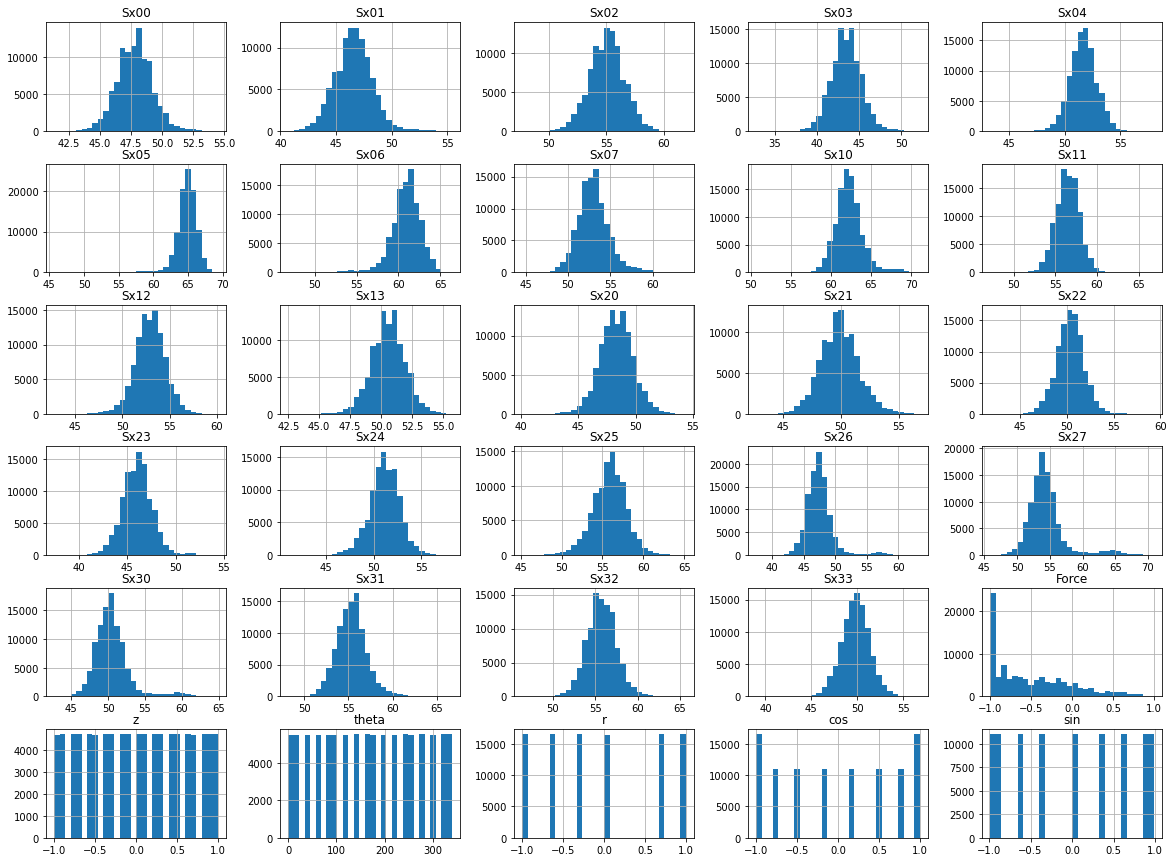

In [358]:
%matplotlib inline
import matplotlib.pyplot as plt
SDreal.hist(bins=30, figsize=(20,15))
plt.show()

In [359]:
SDy = SDreal.iloc[:,24:30]
SDy.describe()

,Force,z,theta,r,cos,sin
count,99122.000000,99122.000000,99122.000000,99122.000000,99122.000000,9.912200e+04
mean,-0.482270,-0.000026,170.048223,-0.055521,-0.000322,-7.532672e-05
std,0.473735,0.605498,103.747361,0.705041,0.707167,7.070537e-01
min,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-9.848078e-01
25%,-0.928883,-0.500000,80.000000,-0.666667,-0.766044,-6.427876e-01
50%,-0.604261,0.000000,180.000000,-0.333333,-0.173648,1.224647e-16
75%,-0.160395,0.500000,260.000000,0.666667,0.766044,6.427876e-01
max,1.000000,1.000000,340.000000,1.000000,1.000000,9.848078e-01


In [360]:
X = SDreal.iloc[:,0:24]
y = SDreal.iloc[:,[24,25,28,29]]

In [361]:
X

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx22,Sx23,Sx24,Sx25,Sx26,Sx27,Sx30,Sx31,Sx32,Sx33
0,46.6,45.6,55.3,42.6,51.4,65.5,61.7,49.6,62.0,56.0,...,50.5,45.5,47.7,58.0,49.4,53.5,48.1,55.5,52.7,47.7
1,46.4,45.0,54.8,42.7,51.2,65.4,61.5,49.8,62.0,55.8,...,50.1,45.8,48.1,57.5,49.0,53.4,48.2,55.6,53.2,48.0
2,46.1,44.5,55.0,42.7,51.1,65.7,61.5,50.0,61.8,55.7,...,50.4,45.3,48.1,57.3,49.3,53.5,48.2,55.8,53.8,47.9
3,46.3,44.6,55.0,42.6,51.3,65.7,62.0,49.4,62.3,55.7,...,50.5,45.3,48.1,56.2,49.4,54.1,48.6,56.2,54.2,47.6
4,46.6,43.8,54.8,42.3,50.9,65.6,62.0,49.6,62.5,55.6,...,50.4,45.1,47.7,55.9,49.7,53.6,49.0,56.3,54.0,47.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115649,49.4,46.2,52.5,44.4,53.1,64.8,61.0,52.6,64.5,54.5,...,48.7,42.5,52.2,54.1,47.7,54.8,47.7,56.7,55.2,47.8
115650,48.9,46.3,52.8,44.5,52.8,64.6,60.8,52.5,64.8,54.9,...,49.4,41.6,52.0,54.4,47.9,54.6,48.6,56.8,55.5,47.8
115651,49.2,46.8,53.5,44.4,53.3,64.9,61.9,52.1,65.2,55.1,...,49.5,41.5,52.3,55.0,47.8,54.5,49.1,57.2,55.6,47.7
115652,49.0,46.6,53.9,44.2,53.3,64.6,62.4,52.9,65.0,55.2,...,49.6,40.7,52.6,55.8,47.6,54.4,49.3,57.3,55.1,47.6


In [362]:
y

,Force,z,cos,sin
0,-0.997241,-1.0,1.000000,0.00000
1,-0.997088,-1.0,1.000000,0.00000
2,-0.995862,-1.0,1.000000,0.00000
3,-0.997548,-1.0,1.000000,0.00000
4,-0.997241,-1.0,1.000000,0.00000
...,...,...,...,...
115649,-0.664189,1.0,0.939693,-0.34202
115650,-0.662963,1.0,0.939693,-0.34202
115651,-0.663422,1.0,0.939693,-0.34202
115652,-0.665108,1.0,0.939693,-0.34202


In [363]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.25, random_state=42)

In [364]:
X_sum = len(X_train)+len(X_valid)+len(X_test)
X_train_per = int(len(X_train)/X_sum*100)
X_valid_per = int(len(X_valid)/X_sum*100)
X_test_per = int(len(X_test)/X_sum*100)

print('X_train: ',len(X_train),'ea',X_train_per,'%   ', 
      'X_valid: ',len(X_valid),'ea',X_valid_per,'%   ',
      'X_test: ',len(X_test),'ea',X_test_per,'%',)

X_train:  59472 ea 59 %    X_valid:  19825 ea 20 %    X_test:  19825 ea 20 %


In [365]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [366]:
import pickle
from joblib import dump, load

file_name = 'myScaler/'+dataname+'_SS.pkl'
dump(scaler, file_name)

['myScaler/231008_0119_2kPa_2line_Data_B26_SS.pkl']

In [367]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Dense(256, activation=keras.layers.LeakyReLU(alpha=0.01), input_shape=X_train.shape[1:], kernel_initializer="he_normal"),
    keras.layers.Dense(256, activation=keras.layers.LeakyReLU(alpha=0.01), kernel_initializer="he_normal"),
    keras.layers.Dense(256, activation=keras.layers.LeakyReLU(alpha=0.01), kernel_initializer="he_normal"),
    keras.layers.Dense(256, activation=keras.layers.LeakyReLU(alpha=0.01), kernel_initializer="he_normal"),
    keras.layers.Dense(4)
])

model.compile(loss="mse", optimizer=keras.optimizers.RMSprop(learning_rate=1e-3, rho=0.9))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_86 (Dense)            (None, 256)               6400      
                                                                 
 dense_87 (Dense)            (None, 256)               65792     
                                                                 
 dense_88 (Dense)            (None, 256)               65792     
                                                                 
 dense_89 (Dense)            (None, 256)               65792     
                                                                 
 dense_90 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 204,804
Trainable params: 204,804
Non-trainable params: 0
_________________________________________________________________


## Callback (best, early stopping, tensorboard)

In [368]:
import os 
#root_logdir = os.path.join(os.curdir, 'mylog/'+data)
root_logdir = os.path.join(os.curdir, 'mylog/'+'231006_Data')

def get_run_logdir():
    import time
    run_id= time.strftime("%m%d_%Hh%Mm%Ss"+dataname)
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [369]:
K = keras.backend
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [370]:
dataname

'231008_0119_2kPa_2line_Data_B26'

In [371]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
n_epochs = 300
batch_size = 8
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[onecycle,early_stopping_cb,tensorboard_cb])
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:5]
y_pred = model.predict(X_new)

Epoch 1/300
1859/1859 [==============================] - 9s 5ms/step - loss: 0.9024 - val_loss: 0.1435
Epoch 2/300
1859/1859 [==============================] - 9s 5ms/step - loss: 0.1203 - val_loss: 0.1135
Epoch 3/300
1859/1859 [==============================] - 9s 5ms/step - loss: 0.0954 - val_loss: 0.1023
Epoch 4/300
1859/1859 [==============================] - 9s 5ms/step - loss: 0.0816 - val_loss: 0.0889
Epoch 5/300
1859/1859 [==============================] - 9s 5ms/step - loss: 0.0726 - val_loss: 0.0862
Epoch 6/300
1859/1859 [==============================] - 9s 5ms/step - loss: 0.0667 - val_loss: 0.0792
Epoch 7/300
1859/1859 [==============================] - 9s 5ms/step - loss: 0.0622 - val_loss: 0.0759
Epoch 8/300
1859/1859 [==============================] - 9s 5ms/step - loss: 0.0588 - val_loss: 0.0712
Epoch 9/300
1859/1859 [==============================] - 9s 5ms/step - loss: 0.0568 - val_loss: 0.0760
Epoch 10/300
1859/1859 [==============================] - 9s 5ms/step - l

In [372]:
model.save('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/TACTS/TACTS_v3/myModel/'+dataname+'.h5')

In [373]:
model = tf.keras.models.load_model('myModel/'+dataname+'.h5')
#model = tf.keras.models.load_model('myModel/' + dataname + '.h5', custom_objects={'rmse': rmse})
scaler = load(file_name)
valid_predictions = model.predict(X_valid)

valid_predictions_df=pd.DataFrame(valid_predictions)
#valid_predictions_df.columns = ["valid_force","valid_z"]
#valid_predictions_df.columns = ["valid_force","valid_z","valid_r"]
valid_predictions_df.columns = ["valid_force","valid_z","valid_cos","valid_sin"]
#valid_predictions_df.columns = ["valid_force","valid_z","valid_r","valid_cos","valid_sin"]
valid_theta_rad = np.arctan2(valid_predictions_df['valid_sin'], valid_predictions_df['valid_cos'])
valid_theta_deg = np.degrees(valid_theta_rad)
valid_predictions_df['valid_theta'] = valid_theta_deg
valid_predictions_df['valid_theta'] /= 180
valid_predictions_df

620/620 [==============================] - 1s 1ms/step


,valid_force,valid_z,valid_cos,valid_sin,valid_theta
0,-0.716399,-0.740272,0.345501,-0.865906,-0.379154
1,-0.407628,-0.631027,0.263274,1.041186,0.421165
2,-0.540656,-0.726522,-0.332886,1.252508,0.582687
3,-0.413144,0.316018,-0.388772,-0.901225,-0.629636
4,-0.439298,0.563472,-0.964168,0.300491,0.903833
...,...,...,...,...,...
19820,-0.359710,0.225406,0.305399,-0.959460,-0.401909
19821,-0.163588,-0.612768,-1.045903,0.654341,0.822050
19822,-0.952121,-0.034666,0.313203,-1.221871,-0.420127
19823,-0.805833,0.628041,0.955419,0.105360,0.034961


In [374]:
k= y_valid.to_numpy()
k_df = pd.DataFrame(k)
k_df.columns  = ["force","z","cos","sin"]
#k_df.columns  = ["force","z","r","cos","sin"]
theta_rad = np.arctan2(k_df['sin'], k_df['cos'])
theta_deg = np.degrees(theta_rad)
k_df['theta'] = theta_deg
k_df['theta'] /= 180
k_df

,force,z,cos,sin,theta
0,-0.972871,-0.7,0.500000,-0.866025,-0.333333
1,-0.882596,-0.6,0.173648,0.984808,0.444444
2,-0.488083,-0.6,-0.173648,0.984808,0.555556
3,-0.182926,0.4,-0.500000,-0.866025,-0.666667
4,-0.734846,0.9,-0.939693,0.342020,0.888889
...,...,...,...,...,...
19820,-0.078244,0.2,0.173648,-0.984808,-0.444444
19821,-0.525787,-0.7,-0.766044,0.642788,0.777778
19822,-0.959231,0.4,-0.173648,-0.984808,-0.555556
19823,-0.824814,1.0,0.939693,0.342020,0.111111


In [375]:
ValidPre = pd.concat( [k_df,valid_predictions_df],axis=1)
ValidPre.head(5)
corr = ValidPre.corr()
print("corr")
n = k_df.shape[1]
for i in range(0,n):    
    print(format(corr[valid_predictions_df.columns[i]][k_df.columns[i]]*100,'.2f')+'%',k_df.columns[i])
corr_matrix = pd.DataFrame(index=k_df.columns, columns=valid_predictions_df.columns)

# 각 열과 행의 상관관계 계산
for k_col in k_df.columns:
    for valid_col in valid_predictions_df.columns:
        corr2 = np.corrcoef(k_df[k_col], valid_predictions_df[valid_col])[0, 1]
        corr_matrix.loc[k_col, valid_col] = corr2
corr_matrix

corr
87.19% force
92.40% z
91.81% cos
91.53% sin
71.90% theta


,valid_force,valid_z,valid_cos,valid_sin,valid_theta
force,0.871878,0.067794,-0.41042,0.316556,0.310472
z,0.039102,0.924019,-0.014165,0.014958,-0.004339
cos,-0.361747,-0.038094,0.918145,0.027267,0.031058
sin,0.35313,0.045375,-0.059205,0.915277,0.7204
theta,0.398451,0.041777,-0.185353,0.713353,0.719028


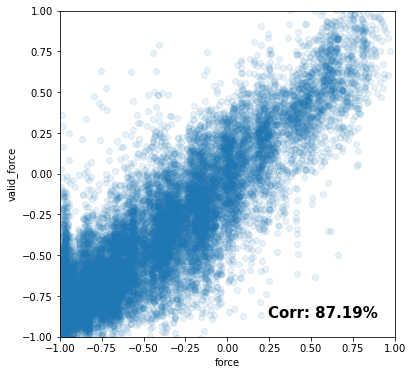

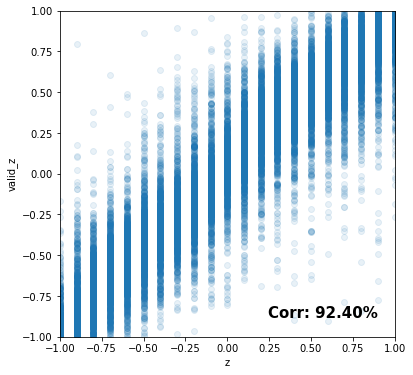

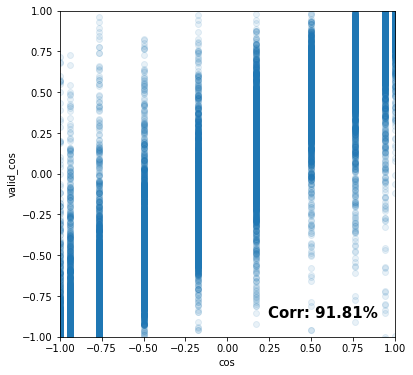

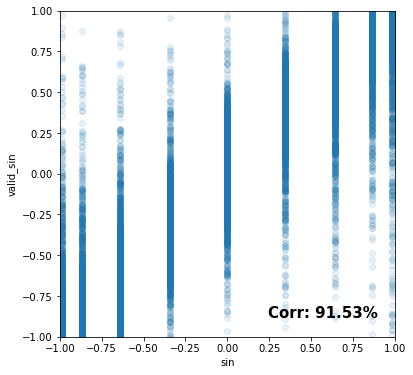

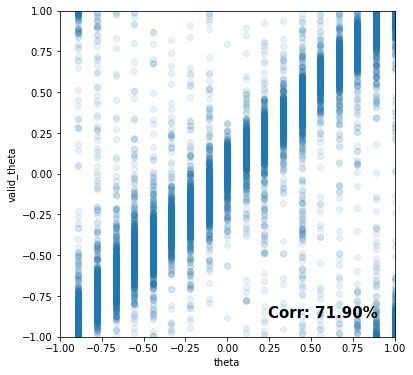

In [376]:
import pandas as pd
import os
import matplotlib.pyplot as plt

alpa = 0.1
output_dir = "myLearningData/savefig/2line"  # 저장할 폴더 이름

# 폴더가 없는 경우 폴더를 생성합니다.
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

fields = ['force','z','cos','sin','theta']
#fields = ['force','z','r','cos','sin','theta']

for field in fields:
    plt.figure(figsize=(6, 6))  # Set the figure size to 1:1
    plt.scatter(ValidPre[field], ValidPre[f"valid_{field}"], alpha=alpa)
    plt.xlabel(field)
    plt.ylabel(f"valid_{field}")
    plt.xlim(-1, 1)  # x축 범위 설정
    plt.ylim(-1, 1)  # y축 범위 설정

    # Compute the correlation value to be added
    corr_value = format(corr[f"valid_{field}"][field]*100,'.2f') + '%'
    plt.text(0.95, 0.05, f'Corr: {corr_value}', ha='right', va='bottom', 
             transform=plt.gca().transAxes, fontsize=15, weight='bold')

    plt.savefig(os.path.join(output_dir, f"{dataname}_{field}.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장
    plt.show()


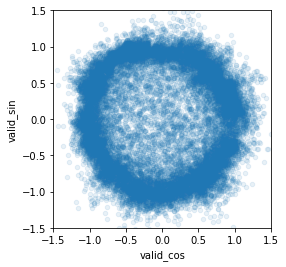

In [377]:
alpa = 0.1  # assuming you've set alpha to this value, adjust as needed
ax = ValidPre.plot(kind="scatter", x="valid_cos", y="valid_sin", alpha=alpa)

# Set the aspect ratio to be equal
ax.set_aspect('equal', 'box')
plt.xlim(-1.5, 1.5)  # x축 범위 설정
plt.ylim(-1.5, 1.5)  # y축 범위 설정
plt.savefig(os.path.join(output_dir, f"{dataname}_Circle.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장

# Display the plot
plt.show()

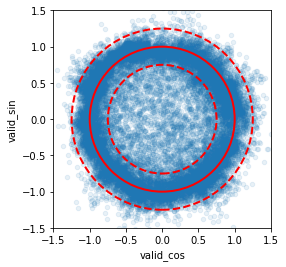

In [378]:
alpha = 0.1  # set alpha value for scatter plot
ax = ValidPre.plot(kind="scatter", x="valid_cos", y="valid_sin", alpha=alpha)

# Draw a circle with center at (0, 0) and radius 1
circle = plt.Circle((0, 0), 1, color='r', fill=False, linewidth=2)
ax.add_artist(circle)

# Draw offset circles (one inside and one outside the main circle)
offset = 0.25  # adjust the offset value as needed
inner_circle = plt.Circle((0, 0), 1 - offset, color='r', linestyle='--', fill=False, linewidth=2)
outer_circle = plt.Circle((0, 0), 1 + offset, color='r', linestyle='--', fill=False, linewidth=2)
ax.add_artist(inner_circle)
ax.add_artist(outer_circle)

# Set the aspect ratio to be equal
ax.set_aspect('equal', 'box')
plt.xlim(-1.5, 1.5)  # x축 범위 설정
plt.ylim(-1.5, 1.5)  # y축 범위 설정
# Display the plot
plt.savefig(os.path.join(output_dir, f"{dataname}_Circle_offset.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장

plt.show()


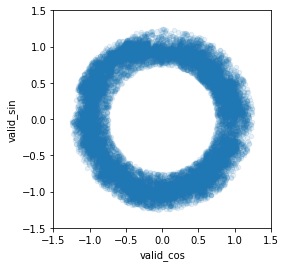

16.78688524590164

In [379]:
ValidPre_filtered = ValidPre[
    (ValidPre['valid_cos']**2 + ValidPre['valid_sin']**2 <= (1 + offset)**2) &
    (ValidPre['valid_cos']**2 + ValidPre['valid_sin']**2 >= (1 - offset)**2)
]


ax = ValidPre_filtered.plot(kind="scatter", x="valid_cos", y="valid_sin", alpha=alpha)
ax.set_aspect('equal', 'box')
plt.xlim(-1.5, 1.5)  # x축 범위 설정
plt.ylim(-1.5, 1.5)  # y축 범위 설정
plt.savefig(os.path.join(output_dir, f"{dataname}_Circle_cut.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장

plt.show()

total_data_count = len(ValidPre)
filtered_data_count = len(ValidPre_filtered)
percentage_filtered_out = ((total_data_count - filtered_data_count) / total_data_count) * 100
percentage_filtered_out

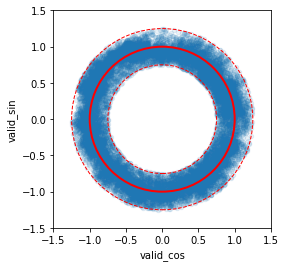

In [380]:
# 기존의 scatter plot을 그립니다.
ax = ValidPre_filtered.plot(kind="scatter", x="valid_cos", y="valid_sin", alpha=alpha)

# 중심이 (0, 0)이고 반지름이 1인 실선 원을 추가합니다.
circle = plt.Circle((0, 0), 1, color='r', fill=False, linewidth=2)
ax.add_artist(circle)

# 점선 원을 추가합니다. 하나는 내부에, 하나는 외부에 위치합니다.
offset = 0.25  # offset 값을 필요에 따라 조정합니다.
inner_circle = plt.Circle((0, 0), 1 - offset, color='r', linestyle='--', fill=False, linewidth=1)
outer_circle = plt.Circle((0, 0), 1 + offset, color='r', linestyle='--', fill=False, linewidth=1)
ax.add_artist(inner_circle)
ax.add_artist(outer_circle)

# 그래프의 비율을 1:1로 설정합니다.
ax.set_aspect('equal', 'box')
plt.xlim(-1.5, 1.5)  # x축 범위 설정
plt.ylim(-1.5, 1.5)  # y축 범위 설정

# 그래프를 파일로 저장합니다.
plt.savefig(os.path.join(output_dir, f"{dataname}_Circle_cut_offset.png"))

# 그래프를 출력합니다.
plt.show()


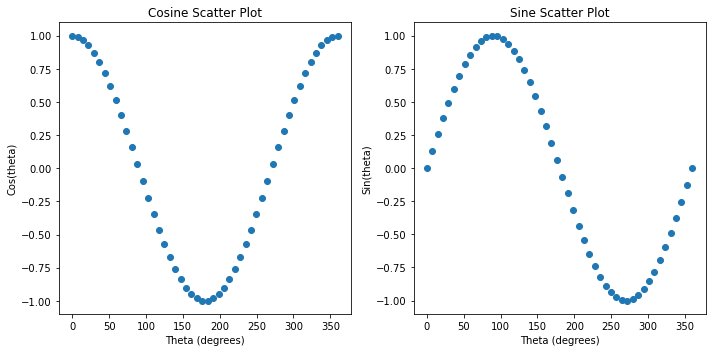

,Theta,Cos,Sin
0,0.000000,1.000000,0.000000
1,7.346939,0.991790,0.127877
2,14.693878,0.967295,0.253655
3,22.040816,0.926917,0.375267
4,29.387755,0.871319,0.490718


In [381]:
import pandas as pd

def generate_theta_cos_sin_dataframe(n):
    # theta 값을 0에서 360도까지 n개로 나눔
    theta = np.linspace(0, 360, n)

    # cos와 sin 값을 계산
    cos_values = np.cos(np.radians(theta))
    sin_values = np.sin(np.radians(theta))

    # 결과를 판다스 데이터프레임으로 생성
    df = pd.DataFrame({'Theta': theta, 'Cos': cos_values, 'Sin': sin_values})

    # 그래프 생성 (스캐터 플롯)
    plt.figure(figsize=(10, 5))

    # Cos 스캐터 플롯
    plt.subplot(1, 2, 1)
    plt.scatter(df['Theta'], df['Cos'])
    plt.title('Cosine Scatter Plot')
    plt.xlabel('Theta (degrees)')
    plt.ylabel('Cos(theta)')

    # Sin 스캐터 플롯
    plt.subplot(1, 2, 2)
    plt.scatter(df['Theta'], df['Sin'])
    plt.title('Sine Scatter Plot')
    plt.xlabel('Theta (degrees)')
    plt.ylabel('Sin(theta)')

    plt.tight_layout()
    plt.show()

    return df

# 예시로 n=50으로 함수 실행
df = generate_theta_cos_sin_dataframe(50)
df.head()  # 데이터프레임의 첫 5개 행을 출력
